In [3]:
import pandas as pd

## Задание 1

In [69]:
movies = pd.read_csv('/Users/docha/PycharmProjects/Python_for_analisys/ml-latest-small 2/movies.csv')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [70]:
ratings = pd.read_csv('/Users/docha/PycharmProjects/Python_for_analisys/ml-latest-small 2/ratings.csv')
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [63]:
rating_filtred = ratings.groupby('movieId')['rating'].mean()
rating_filtred

movieId
1         3.872470
2         3.401869
3         3.161017
4         2.384615
5         3.267857
            ...   
161944    5.000000
162376    4.500000
162542    5.000000
162672    3.000000
163949    5.000000
Name: rating, Length: 9066, dtype: float64

In [64]:
df = pd.merge(movies, rating_filtred, on='movieId')
df

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.872470
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.401869
2,3,Grumpier Old Men (1995),Comedy|Romance,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.384615
4,5,Father of the Bride Part II (1995),Comedy,3.267857
...,...,...,...,...
9061,161944,The Last Brickmaker in America (2001),Drama,5.000000
9062,162376,Stranger Things,Drama,4.500000
9063,162542,Rustom (2016),Romance|Thriller,5.000000
9064,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,3.000000


In [67]:
def define_class(rating):
    if rating <= 2:
        return 'низкий рейтинг'
    elif 2 < rating < 4.5:
        return 'средний рейтинг'
    else:
        return 'высокий рейтинг'

In [68]:
df['class'] = df['rating'].apply(define_class)
df

,movieId,title,genres,rating,class
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.872470,средний рейтинг
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.401869,средний рейтинг
2,3,Grumpier Old Men (1995),Comedy|Romance,3.161017,средний рейтинг
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.384615,средний рейтинг
4,5,Father of the Bride Part II (1995),Comedy,3.267857,средний рейтинг
...,...,...,...,...,...
9061,161944,The Last Brickmaker in America (2001),Drama,5.000000,высокий рейтинг
9062,162376,Stranger Things,Drama,4.500000,высокий рейтинг
9063,162542,Rustom (2016),Romance|Thriller,5.000000,высокий рейтинг
9064,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,3.000000,средний рейтинг


# Задание 2

In [176]:
keywords = pd.read_csv('/Users/docha/PycharmProjects/Python_for_analisys/ml-latest-small 2/keywords.csv')

keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [177]:
geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}
geo_data.keys()

dict_keys(['Центр', 'Северо-Запад', 'Дальний Восток'])

In [189]:
def define_region(row):
    r = 'undefined'
    for reg in geo_data.keys():
        searchfor = geo_data[reg]
        for s in searchfor:
            if s in row:
                r = reg
    return r

In [190]:
keywords['region'] =  keywords['keyword'].apply(define_region)
keywords.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [191]:
keywords['region'].unique()

array(['undefined', 'Центр', 'Северо-Запад', 'Дальний Восток'],
      dtype=object)

In [194]:
keywords.groupby('region')['keyword'].count()

region
undefined         99253
Дальний Восток       94
Северо-Запад        268
Центр               385
Name: keyword, dtype: int64

# Задание 3

In [197]:
years = [str(x) for x in range(1950, 2022)]


In [205]:
movies = pd.read_csv('/Users/docha/PycharmProjects/Python_for_analisys/ml-latest-small 2/movies.csv')
movies.head(5)
len(movies)

9125

In [204]:
ratings = pd.read_csv('/Users/docha/PycharmProjects/Python_for_analisys/ml-latest-small 2/ratings.csv')
ratings.head(5)
len(ratings)

100004

In [200]:
def find_year(row):
    r = '1900'
    for y in years:
        if y in row:
            r = y
    return r

In [212]:
df = pd.merge(movies, ratings, on='movieId')
df.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


In [213]:
df['production_year'] = df['title'].apply(find_year)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100004 entries, 0 to 100003
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movieId          100004 non-null  int64  
 1   title            100004 non-null  object 
 2   genres           100004 non-null  object 
 3   userId           100004 non-null  int64  
 4   rating           100004 non-null  float64
 5   timestamp        100004 non-null  int64  
 6   production_year  100004 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 6.1+ MB


In [234]:
year_movie = df.groupby('production_year')['movieId'].count()

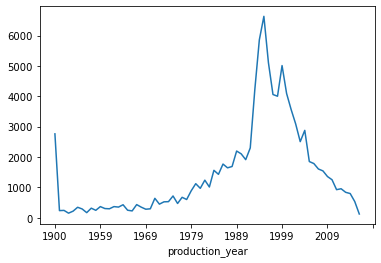

In [235]:
year_movie.plot();

In [226]:
group_df = df.groupby('production_year')['rating'].mean().sort_values(ascending=False)
group_df

production_year
1957    4.014241
1972    4.011136
1952    4.000000
1974    3.999058
1954    3.994220
          ...   
2012    3.386506
2015    3.371028
2013    3.356973
2000    3.353444
2016    3.217742
Name: rating, Length: 68, dtype: float64

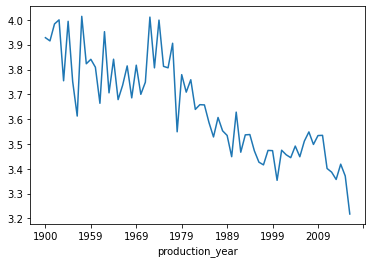

In [222]:
group_df.plot();